In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


# Data Information
About Dataset
Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

# Introduction

<font size=4> This is my second ML project. This time, I have done Feature Engineering and normalized numerical data before training a model. I have tried around ten different machine learning models to see whcih ML model has the greatest prediction. Please give me stars if you like it.</font> 
 

# import library and data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
data.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
522,6,114,0,0,0,0.0,0.189,26,0
271,2,108,62,32,56,25.2,0.128,21,0


In [4]:
data['Outcome'].unique()

array([1, 0])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


all data are numerical data

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null data

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Exploratory Data Analysis

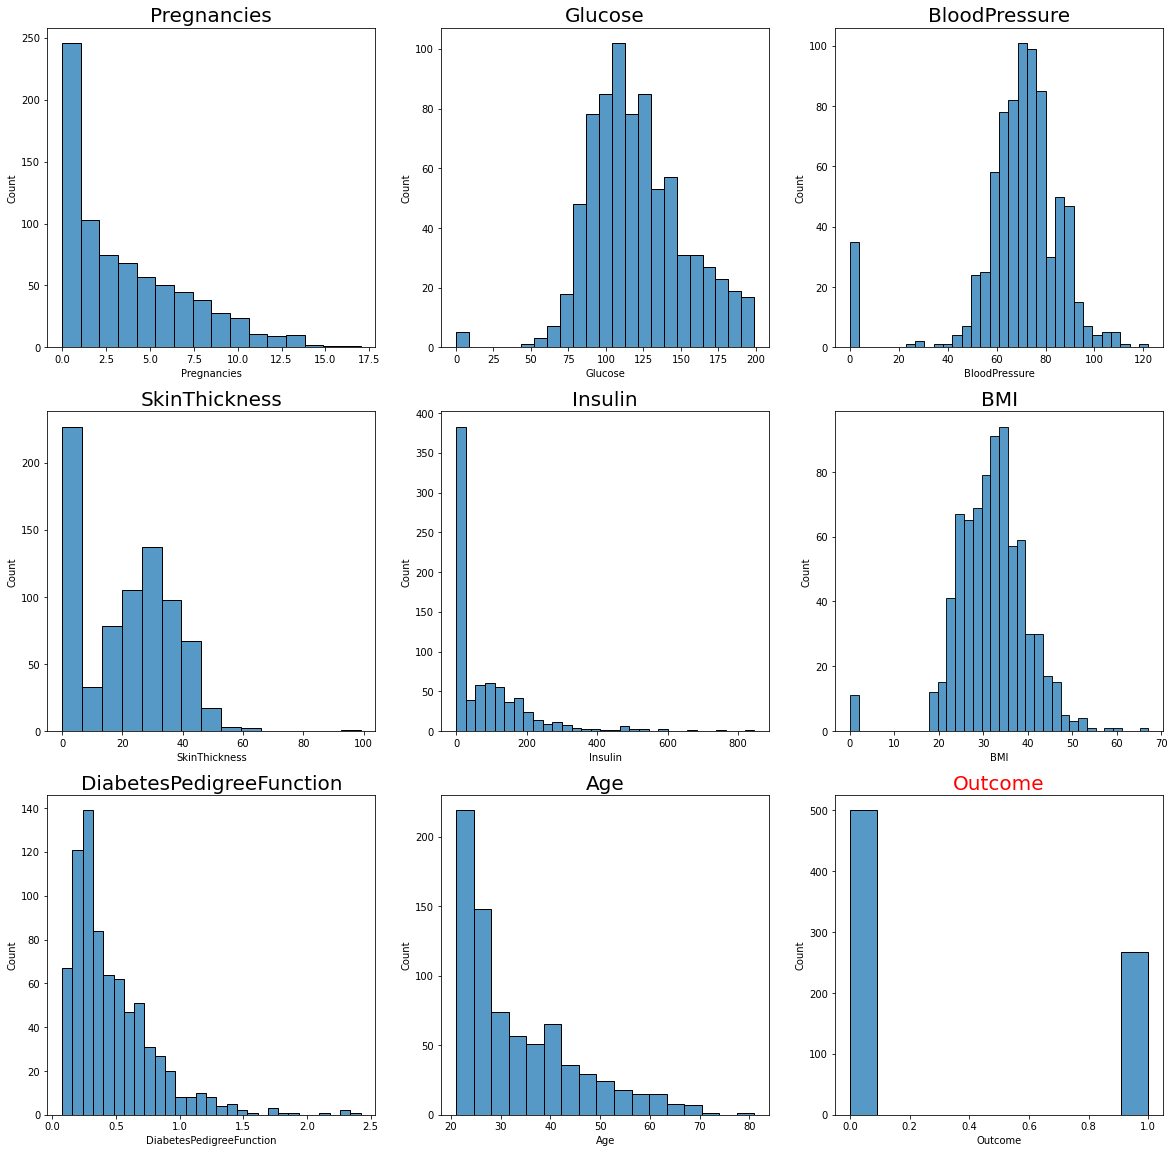

In [9]:
# To see the distribution of each columns
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(data['Pregnancies'])
plt.title("Pregnancies", fontsize=20)

plt.subplot(3,3,2)
sns.histplot(data['Glucose'])
plt.title("Glucose", fontsize=20)


plt.subplot(3,3,3)
sns.histplot(data['BloodPressure'])
plt.title("BloodPressure", fontsize=20)


plt.subplot(3,3,4)
sns.histplot(data['SkinThickness'])
plt.title("SkinThickness", fontsize=20)

plt.subplot(3,3,5)
sns.histplot(data['Insulin'])
plt.title("Insulin", fontsize=20)

plt.subplot(3,3,6)
sns.histplot(data['BMI'])
plt.title("BMI", fontsize=20)

plt.subplot(3,3,7)
sns.histplot(data['DiabetesPedigreeFunction'])
plt.title("DiabetesPedigreeFunction", fontsize=20)

plt.subplot(3,3,8)
sns.histplot(data['Age'])
plt.title("Age", fontsize=20)


plt.subplot(3,3,9)
sns.histplot(data['Outcome'])
plt.title("Outcome", fontsize=20, color='red')


plt.show()

## Null Data treatment

In [10]:
#zero values exist in five columns is weird, replacing these zero values to Nan Value will be more reasonable
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col].replace(0,np.NaN,inplace=True)

data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
data.isnull().sum() / len(data) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

SkinThickness and Insulin has more serious missing data

filling in missing data via KNN imputer. Because KNN Imptuer is a distance-based imputation method, it requires us to normalize our data. Also normalized data can produce better results in some machine learning model, such as logestic regression, SVM, and KNN, etc.

In [12]:
from sklearn.preprocessing import MinMaxScaler
the_scaler = MinMaxScaler()
data = pd.DataFrame(the_scaler.fit_transform(data), columns=data.columns)

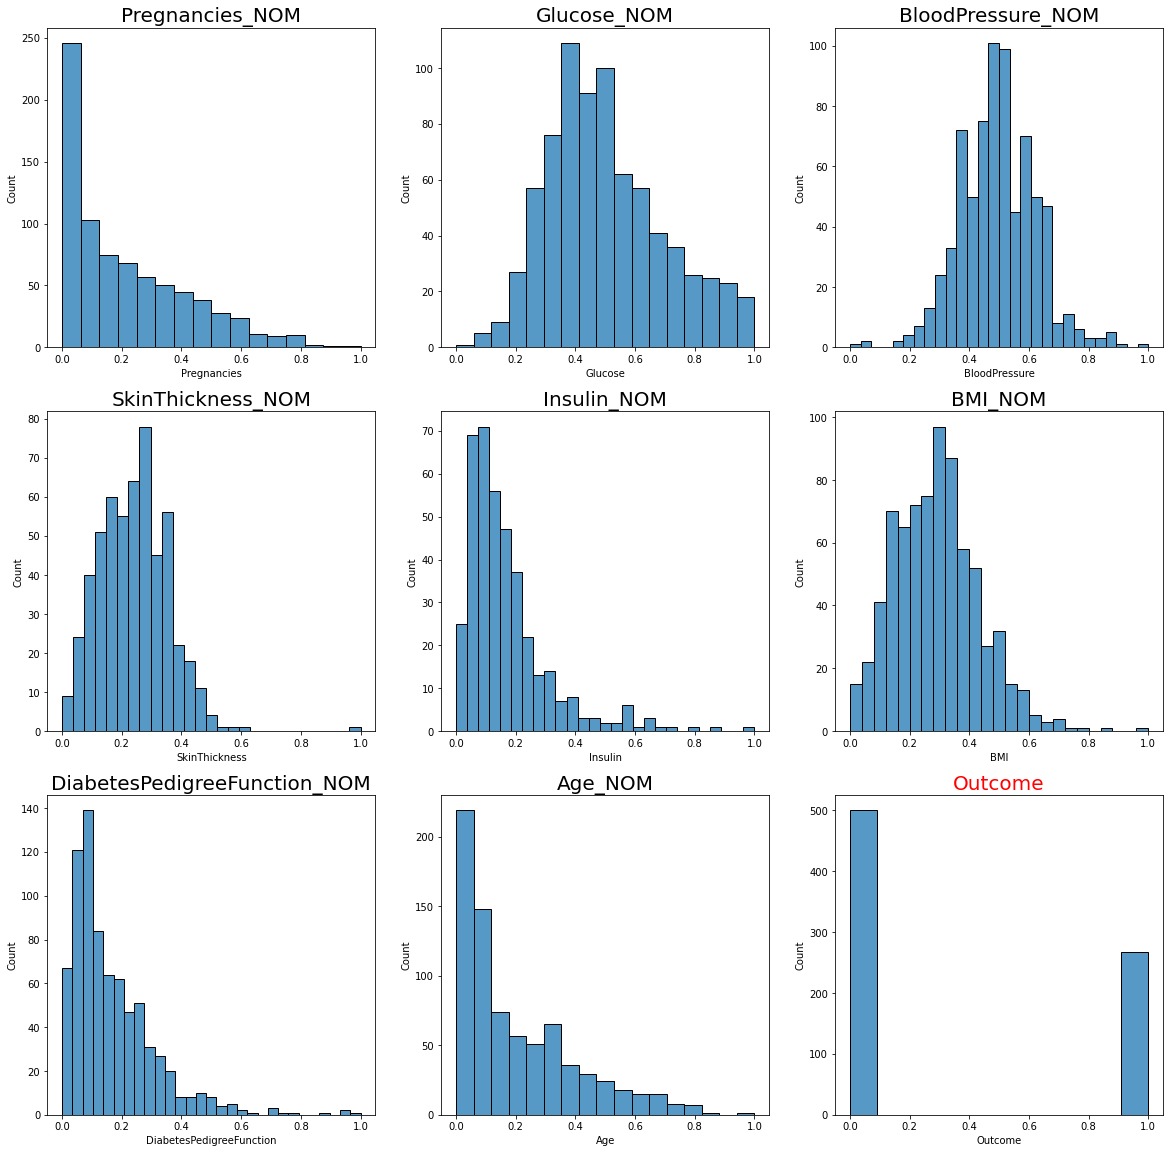

In [13]:
# To see the distribution of each columns
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.histplot(data['Pregnancies'])
plt.title("Pregnancies_NOM", fontsize=20)

plt.subplot(3,3,2)
sns.histplot(data['Glucose'])
plt.title("Glucose_NOM", fontsize=20)


plt.subplot(3,3,3)
sns.histplot(data['BloodPressure'])
plt.title("BloodPressure_NOM", fontsize=20)


plt.subplot(3,3,4)
sns.histplot(data['SkinThickness'])
plt.title("SkinThickness_NOM", fontsize=20)

plt.subplot(3,3,5)
sns.histplot(data['Insulin'])
plt.title("Insulin_NOM", fontsize=20)

plt.subplot(3,3,6)
sns.histplot(data['BMI'])
plt.title("BMI_NOM", fontsize=20)

plt.subplot(3,3,7)
sns.histplot(data['DiabetesPedigreeFunction'])
plt.title("DiabetesPedigreeFunction_NOM", fontsize=20)

plt.subplot(3,3,8)
sns.histplot(data['Age'])
plt.title("Age_NOM", fontsize=20)


plt.subplot(3,3,9)
sns.histplot(data['Outcome'])
plt.title("Outcome", fontsize=20, color='red')


plt.show()

All data are locted between 0 and 1

In [14]:
zero = data.loc[data['Outcome']==0]
one =  data.loc[data['Outcome']==1]

In [15]:
# fill in missing data via KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null data now

In [16]:
# transform data back to original scaler
df = pd.DataFrame(the_scaler.inverse_transform(df), columns=data.columns)

## Bivariate Analysis

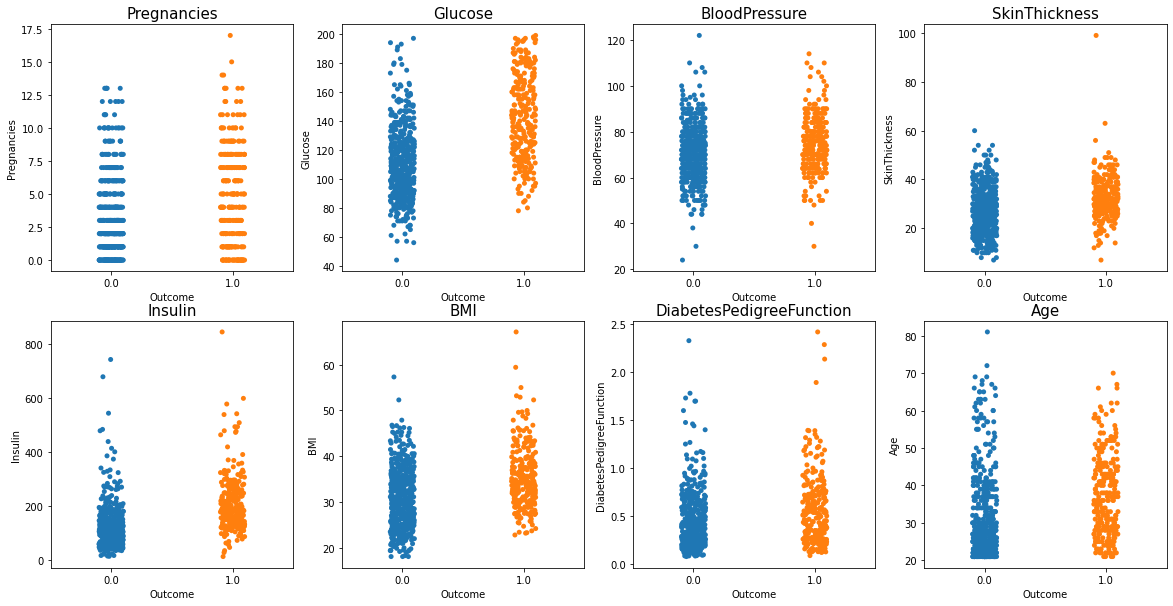

In [17]:
plt.figure(figsize=(20,10))

for i in range(8):
    col = data.columns[i]
    plt.subplot(2,4,i+1)
    sns.stripplot(x='Outcome', y=col, data=df)
    plt.title(col, fontsize=15)

## Correlation

<AxesSubplot:>

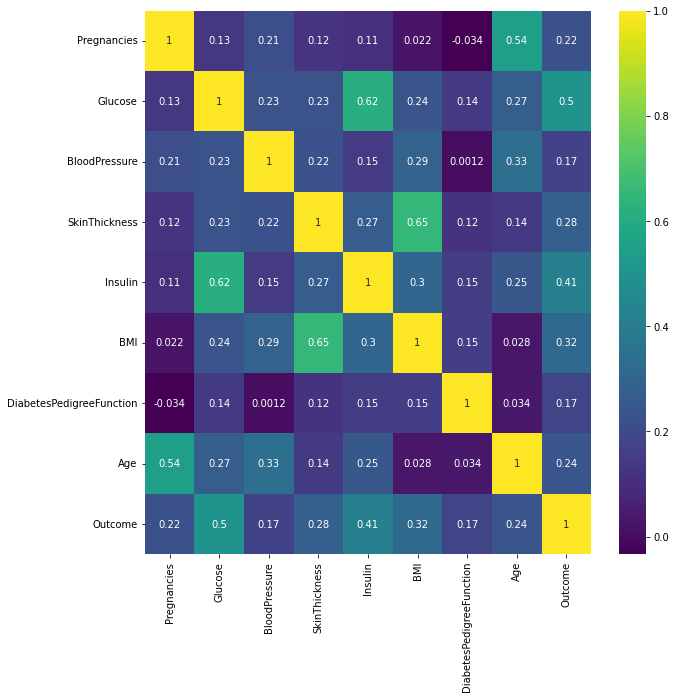

In [18]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True, cmap = 'viridis')

Glucose has higher correlation to insulin, but the more interesting thing is that BMI has higher correlation to Skinthickness

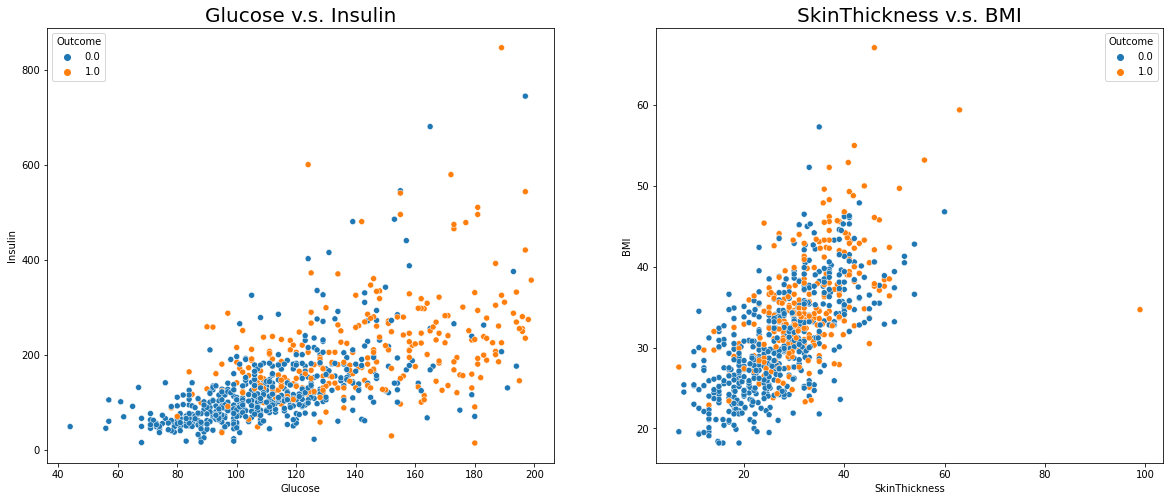

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title("Glucose v.s. Insulin", fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(x='SkinThickness', y='BMI', hue='Outcome', data=df)
plt.title("SkinThickness v.s. BMI", fontsize=20)

plt.show()

# Data Preprocessing for Machine Engineering

## Feature Engineering

Base on CDC, 
1. Glucose --- A fasting blood sugar level(Glucose) of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwicm-2vg_H4AhXagoQIHeBqDkkQFnoECBMQAw&url=https%3A%2F%2Fwww.cdc.gov%2Fdiabetes%2Fbasics%2Fgetting-tested.html&usg=AOvVaw14tQUqSBQh0XcC2f9dSX9-<br>
2. BMI --- Below 18.5, Underweight ; 18.5—24.9, Healthy ; 25.0—29.9, Overweight ; 30.0 and Above, Obese
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiZ_LrQg_H4AhXutYQIHckaCNgQFnoECBAQAQ&url=https%3A%2F%2Fwww.cdc.gov%2Fhealthyweight%2Fassessing%2Fbmi%2Fadult_bmi%2Fenglish_bmi_calculator%2Fbmi_calculator.html&usg=AOvVaw2F_ENcffxAfvVdtJK_ppa5<br>
3.Blood Pressure --- According to American Hear Association<br>
![Blood Pressure Category](https://www.heart.org/-/media/Images/Health-Topics/High-Blood-Pressure/Rainbow-Chart/blood-pressure-readings-chart.jpg)

In [20]:
df['New_Glucose_Class'] = pd.cut(x=df['Glucose'], bins=[0,99,125, 210],labels = ["Normal","Prediabetes", "Diabates"])
df['New_BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.4,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])
df['New_BloodPressure'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,120,200],labels = ["Normal","HS1","HS2","HS_Crisis"])

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0,Diabates,Obese,Normal
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0,Normal,Overweight,Normal
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0,Diabates,Healty,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,Diabates,Obese,Normal


In [22]:
df.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
New_Glucose_Class           category
New_BMI_Range               category
New_BloodPressure           category
dtype: object

## Label Categorical Data

In [23]:
#Select columns columns
categorical_cols = [cname for cname in df.columns if  df[cname].dtype == "category"]

# Select numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

In [24]:
categorical_cols

['New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure']

In [25]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data, i):
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [26]:
for l in categorical_cols:
    label_encoder(df,l)

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0,0,1,3
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0,1,2,3
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0,0,0,3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,1,2,3
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0,1,3


## Normalized Numerical Columns

In [28]:
the_scaler_num = MinMaxScaler()
df_num = pd.DataFrame(the_scaler_num.fit_transform(df[numerical_cols[:-1]]), columns=numerical_cols[:-1])

## Train and split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure'],
      dtype='object')

In [31]:
selected = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age',
       'New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure']

In [32]:
X = pd.concat([df_num,df[categorical_cols]], axis=1)
#X = df[selected]
Y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 11), (154, 11), (614,), (154,))

## Building Model 

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [35]:
def KNN(n,X_train, Y_train, X_test, Y_test):
    model = KNeighborsClassifier(n_neighbors=n) 
    scores = cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
    model.fit(X_train,Y_train)
    return (scores.mean() * 100,model.score(X_test,Y_test)*100)

In [36]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []
result_mean = []

for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    results.append(cv_results)
    result_mean.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.760497 (0.034717)
KNN: 0.754045 (0.049659)
DT: 0.724696 (0.052262)
RF: 0.789873 (0.036894)
SVR: 0.755711 (0.048974)
XGBM: 0.778583 (0.046418)
GB: 0.776785 (0.042820)
LightGBM: 0.785008 (0.030652)


In [37]:
s = dict(zip(names,result_mean))
print("The best performance model is {} : {}".format(max(s, key=s.get),s[max(s, key=s.get)]) )

The best performance model is RF : 0.7898730830248546
